# Loading Libraries

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Uploading Files

In [3]:
data = pd.read_csv('credit_card.csv')
cr = data.copy()

In [4]:
cr.head()

,CUST_ID,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12
4,C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12


## Checking Null Values

In [5]:
cr.isnull().sum()

CUST_ID                   0
BALANCE                   0
PURCHASES                 0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CREDIT_LIMIT              0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
TENURE                    0
dtype: int64

## Setting CUST_ID Column as Index

In [6]:
cr.set_index('CUST_ID', inplace = True)

In [7]:
cr

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
CUST_ID,,,,,,,,
C10001,40.900749,95.40,95.40,0.000000,1000.0,201.802084,139.509787,12
C10002,3202.467416,0.00,0.00,6442.945483,7000.0,4103.032597,1072.340217,12
C10003,2495.148862,773.17,0.00,0.000000,7500.0,622.066742,627.284787,12
C10004,1666.670542,1499.00,0.00,205.788017,7500.0,0.000000,312.343947,12
C10005,817.714335,16.00,0.00,0.000000,1200.0,678.334763,244.791237,12
...,...,...,...,...,...,...,...,...
C19186,28.493517,291.12,291.12,0.000000,1000.0,325.594462,48.886365,6
C19187,19.183215,300.00,300.00,0.000000,1000.0,275.861322,312.343947,6
C19188,23.398673,144.40,144.40,0.000000,1000.0,81.270775,82.418369,6


In [8]:
cr.dtypes

BALANCE                   float64
PURCHASES                 float64
INSTALLMENTS_PURCHASES    float64
CASH_ADVANCE              float64
CREDIT_LIMIT              float64
PAYMENTS                  float64
MINIMUM_PAYMENTS          float64
TENURE                      int64
dtype: object

## Training Model Without Scaled Data

In [9]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(cr)

C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [10]:
kmeans.labels_

array([1, 0, 2, ..., 1, 1, 1])

In [11]:
pred = cr.copy()

In [12]:
pred['kmeans'] = kmeans.labels_
pred.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmeans
CUST_ID,,,,,,,,,
C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,1
C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,0
C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,2
C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,2
C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,1


In [13]:
pred['kmeans'].value_counts()

kmeans
1    5416
2    2485
0     890
3     103
4      56
Name: count, dtype: int64

## Training Model with Scaled Data

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale = scaler.fit_transform(cr)

In [15]:
type(scale)

numpy.ndarray

In [16]:
scale

array([[2.14779454e-03, 1.94536779e-03, 4.24000000e-03, ...,
        3.97863135e-03, 1.82564563e-03, 1.00000000e+00],
       [1.68169097e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.08933873e-02, 1.40344791e-02, 1.00000000e+00],
       [1.31026136e-01, 1.57662475e-02, 0.00000000e+00, ...,
        1.22643641e-02, 8.20961806e-03, 1.00000000e+00],
       ...,
       [1.22871936e-03, 2.94456089e-03, 6.41777778e-03, ...,
        1.60229492e-03, 1.07843629e-03, 0.00000000e+00],
       [7.06688341e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.03604933e-03, 7.29475795e-04, 0.00000000e+00],
       [1.95717777e-02, 2.22932216e-02, 0.00000000e+00, ...,
        1.24533826e-03, 1.15527021e-03, 0.00000000e+00]])

In [17]:
cr.columns

Index(['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE'],
      dtype='object')

In [18]:
new_col = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

In [19]:
scaled_data = pd.DataFrame(columns = new_col, data = scale)

In [20]:
scaled_data.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,0.002148,0.001945,0.00424,0.000000,0.031720,0.003979,0.001826,1.0
1,0.168169,0.000000,0.00000,0.136685,0.232053,0.080893,0.014034,1.0
2,0.131026,0.015766,0.00000,0.000000,0.248748,0.012264,0.008210,1.0
3,0.087521,0.030567,0.00000,0.004366,0.248748,0.000000,0.004088,1.0
4,0.042940,0.000326,0.00000,0.000000,0.038397,0.013374,0.003204,1.0


In [21]:
kmeans1 = KMeans(n_clusters = 5, random_state = 0)
kmeans1.fit(scaled_data)

C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=0)

In [22]:
pred['kmeans1'] = kmeans1.labels_
pred.head()

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmeans,kmeans1
CUST_ID,,,,,,,,,,
C10001,40.900749,95.40,95.4,0.000000,1000.0,201.802084,139.509787,12,1,2
C10002,3202.467416,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,0,0
C10003,2495.148862,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,2,0
C10004,1666.670542,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,2,0
C10005,817.714335,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,1,2


In [23]:
pred['kmeans1'].value_counts()

kmeans1
2    4989
0    2136
4     836
3     595
1     394
Name: count, dtype: int64

## Silhouette Score (To check quality of Clusters, it ranges from -1 to 1 and good silhouette_score is 0.6 or greater)

In [24]:
s_score = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    s_score.append([k, silhouette_score(scaled_data, kmeans.labels_)])

C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [25]:
s_score

[[2, 0.6924390439486894],
 [3, 0.5064739837706327],
 [4, 0.39043392597316157],
 [5, 0.39776809030265703],
 [6, 0.41909862326038955],
 [7, 0.42124693567055793],
 [8, 0.42511997936737483],
 [9, 0.37107053237058923],
 [10, 0.35705103635539426],
 [11, 0.329298305411607],
 [12, 0.3449583280139075],
 [13, 0.3598256692491226],
 [14, 0.2788326998287702]]

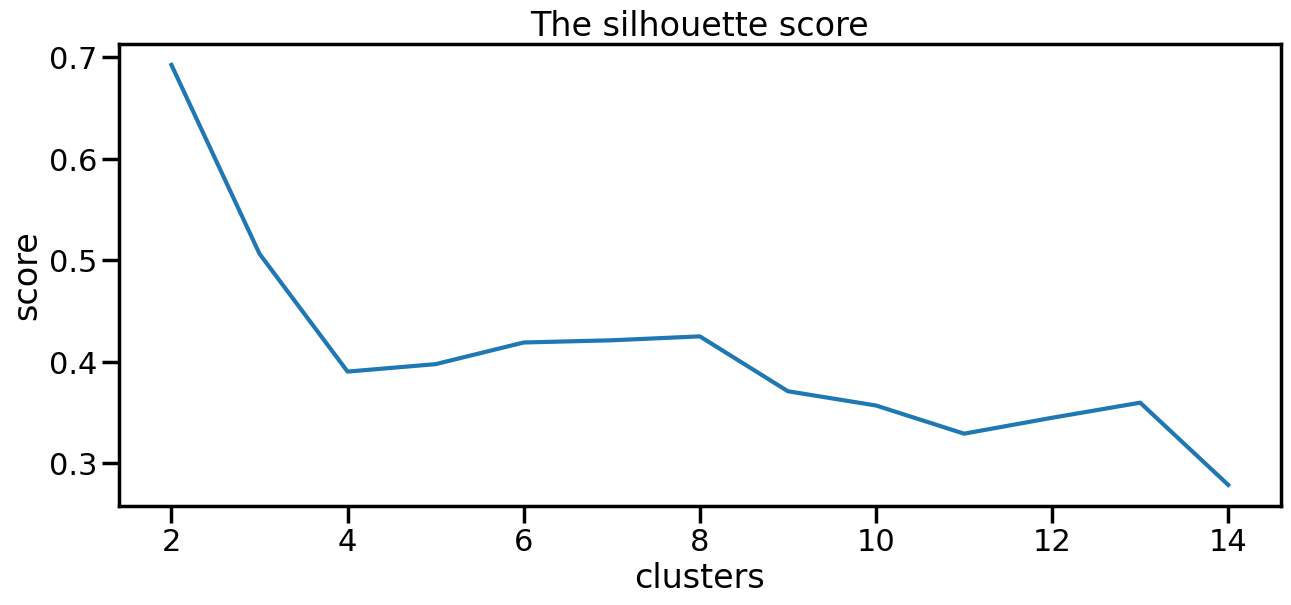

In [26]:
plt.figure(figsize=(15,6))
sns.set_context('poster')
plt.plot( pd.DataFrame(s_score)[0], pd.DataFrame(s_score)[1])
plt.xlabel('clusters')
plt.ylabel('score')
plt.title('The silhouette score') 
plt.show()

In [27]:
kmean2 = KMeans(n_clusters=3, random_state=0)
kmean2.fit(scaled_data)
pred['kmean2'] = kmean2.labels_

C:\Users\khann\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
pred

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmeans,kmeans1,kmean2
CUST_ID,,,,,,,,,,,
C10001,40.900749,95.40,95.40,0.000000,1000.0,201.802084,139.509787,12,1,2,1
C10002,3202.467416,0.00,0.00,6442.945483,7000.0,4103.032597,1072.340217,12,0,0,2
C10003,2495.148862,773.17,0.00,0.000000,7500.0,622.066742,627.284787,12,2,0,2
C10004,1666.670542,1499.00,0.00,205.788017,7500.0,0.000000,312.343947,12,2,0,1
C10005,817.714335,16.00,0.00,0.000000,1200.0,678.334763,244.791237,12,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,291.12,291.12,0.000000,1000.0,325.594462,48.886365,6,1,1,0
C19187,19.183215,300.00,300.00,0.000000,1000.0,275.861322,312.343947,6,1,1,0
C19188,23.398673,144.40,144.40,0.000000,1000.0,81.270775,82.418369,6,1,1,0


In [29]:
pred['kmean2'].value_counts()

kmean2
1    6484
2    1702
0     764
Name: count, dtype: int64

In [30]:
sd = scaled_data.copy()

In [31]:
pred['kmean2']

CUST_ID
C10001    1
C10002    2
C10003    2
C10004    1
C10005    1
         ..
C19186    0
C19187    0
C19188    0
C19189    0
C19190    0
Name: kmean2, Length: 8950, dtype: int32

In [32]:
sd['kmean'] = kmean2.labels_

In [33]:
sd

,BALANCE,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,kmean
0,0.002148,0.001945,0.004240,0.000000,0.031720,0.003979,0.001826,1.0,1
1,0.168169,0.000000,0.000000,0.136685,0.232053,0.080893,0.014034,1.0,2
2,0.131026,0.015766,0.000000,0.000000,0.248748,0.012264,0.008210,1.0,2
3,0.087521,0.030567,0.000000,0.004366,0.248748,0.000000,0.004088,1.0,1
4,0.042940,0.000326,0.000000,0.000000,0.038397,0.013374,0.003204,1.0,1
...,...,...,...,...,...,...,...,...,...
8945,0.001496,0.005936,0.012939,0.000000,0.031720,0.006419,0.000640,0.0,0
8946,0.001007,0.006118,0.013333,0.000000,0.031720,0.005439,0.004088,0.0,0
8947,0.001229,0.002945,0.006418,0.000000,0.031720,0.001602,0.001078,0.0,0
8948,0.000707,0.000000,0.000000,0.000776,0.015025,0.001036,0.000729,0.0,0
